# Mohammad Abu Shams 
# 1200549
# Section 2
# Dr. Yazan Abu Farha
# 22/12/2023

# Model Selection and Hyper-parameters Tunning

# Question1

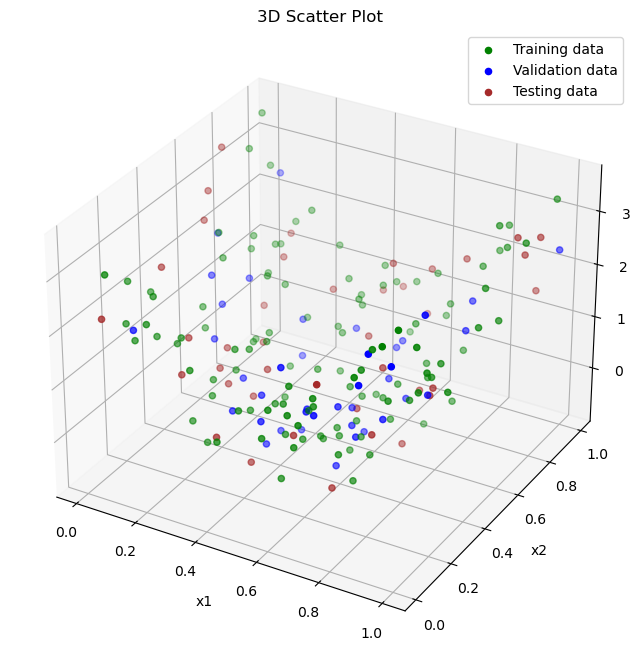

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data. 
data = pd.read_csv('data_reg.csv')

# Split it into training set, validation set and testing set.
train_data = data.iloc[:120]
validation_data = data.iloc[120:160]
test_data = data.iloc[160:]

# Get features and target labels.
train_features = train_data[["x1", "x2"]].to_numpy()
train_labels = train_data["y"].to_numpy()

validation_features = validation_data[["x1", "x2"]].to_numpy()
validation_labels = validation_data["y"].to_numpy()

test_features = test_data[["x1", "x2"]].to_numpy()
test_labels = test_data["y"].to_numpy()

#3D scatter plot.
figure = plt.figure(figsize=(8, 10))
plot = figure.add_subplot(111, projection='3d')
plot.scatter(train_features[:, 0], train_features[:, 1], train_labels, color="green", label="Training data")
plot.scatter(validation_features[:, 0], validation_features[:, 1], validation_labels, color="blue", label="Validation data")
plot.scatter(test_features[:, 0], test_features[:, 1], test_labels, color="brown", label="Testing data")
plot.set_xlabel("x1")
plot.set_ylabel("x2")
plot.set_zlabel("y")
plot.set_title('3D Scatter Plot')

plt.legend()
plt.show()

The 3D scatter plot shows how data is spread out in three different aspects. i use different colors(green, blue, and brown)to
represent training, validation, and testing data. Looking at the plot, the data covers a wide range on the x1-x2 plane and along the y-axis. This is helping to see how the points are distributed and if the training, validation, and testing sets are similar in terms of their overall characteristics.

# Question2

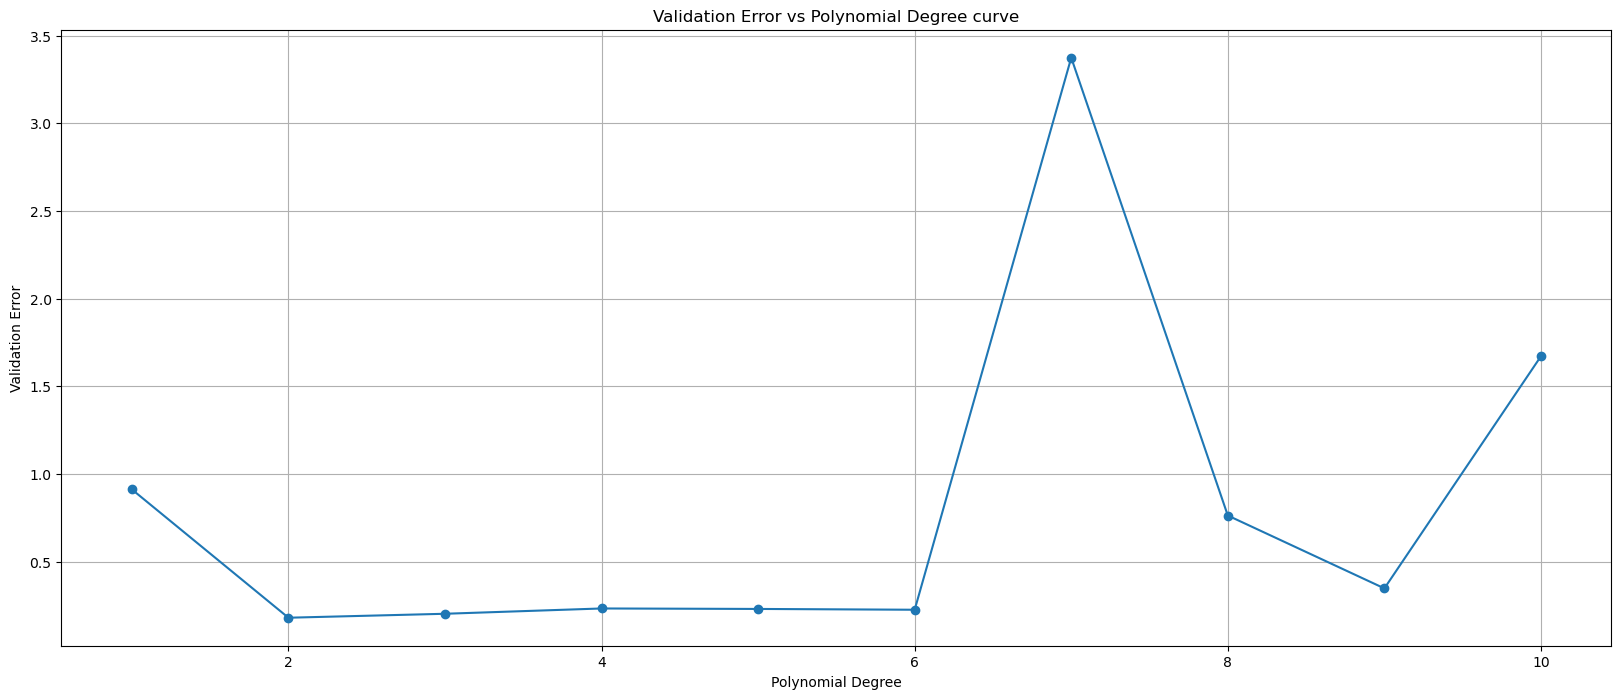

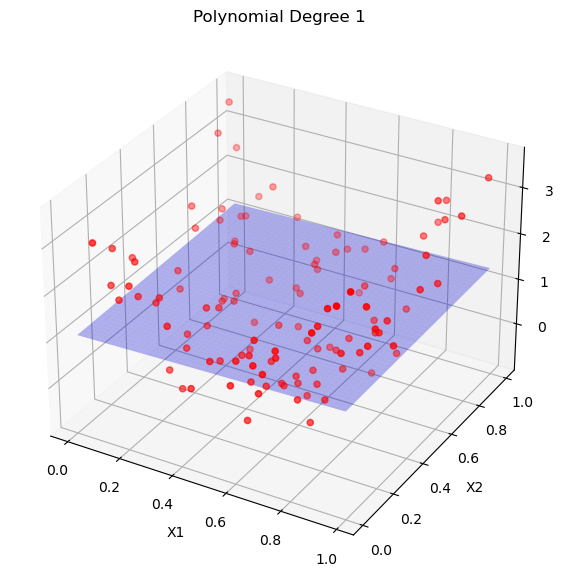

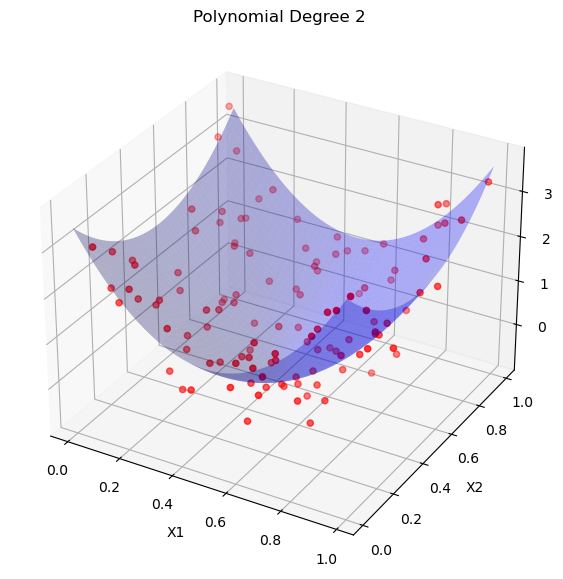

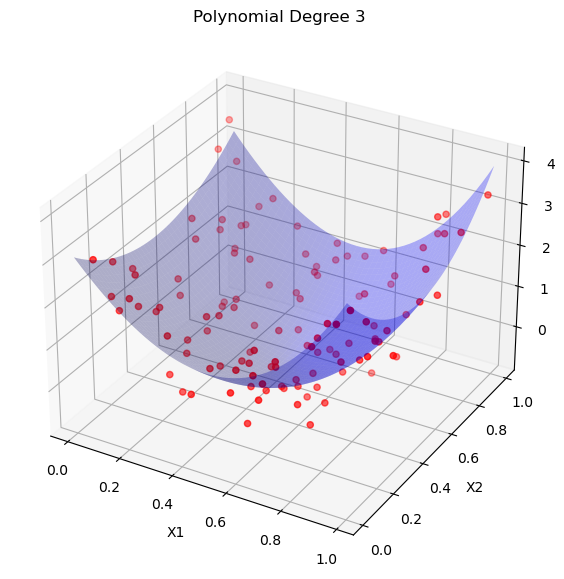

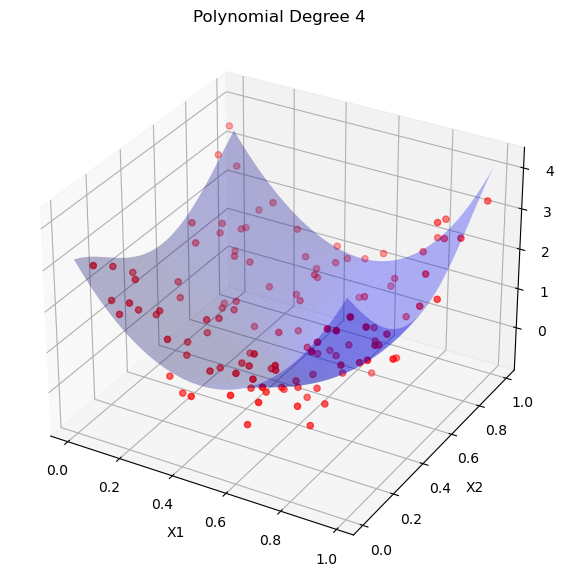

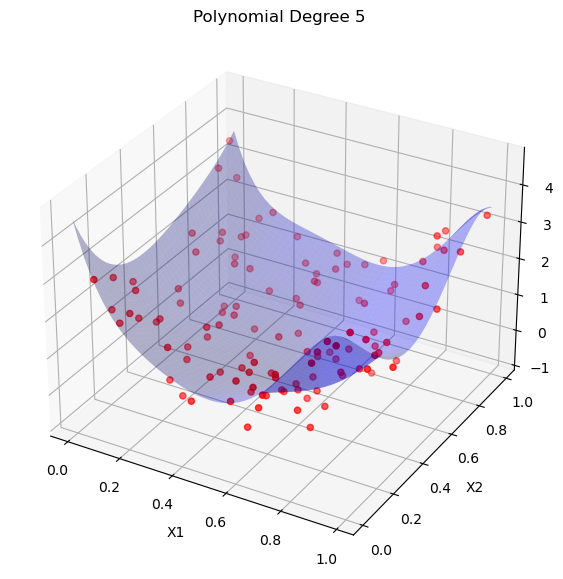

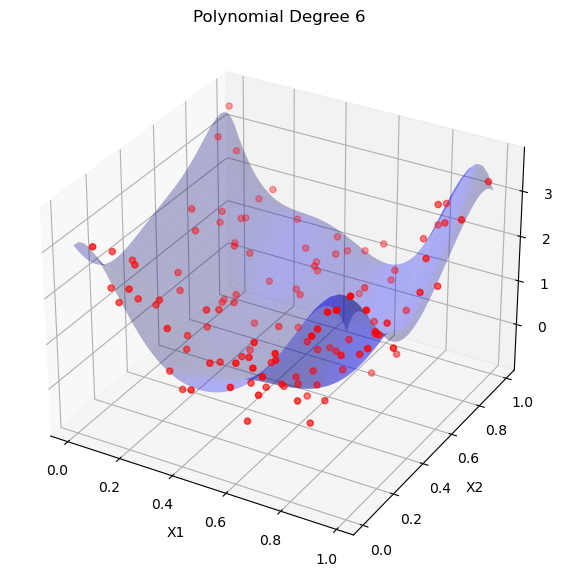

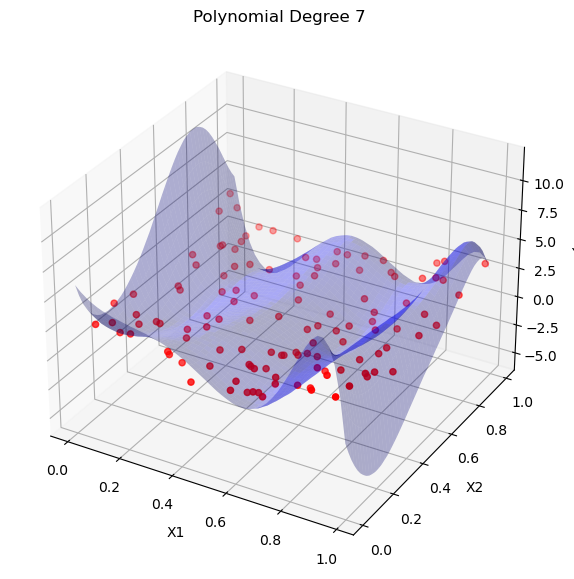

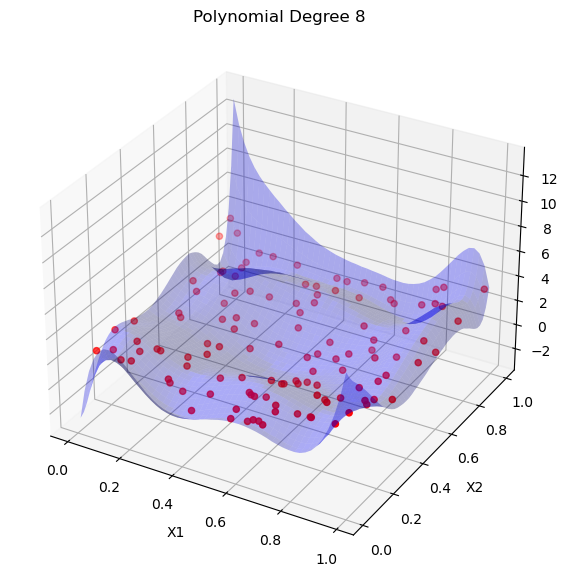

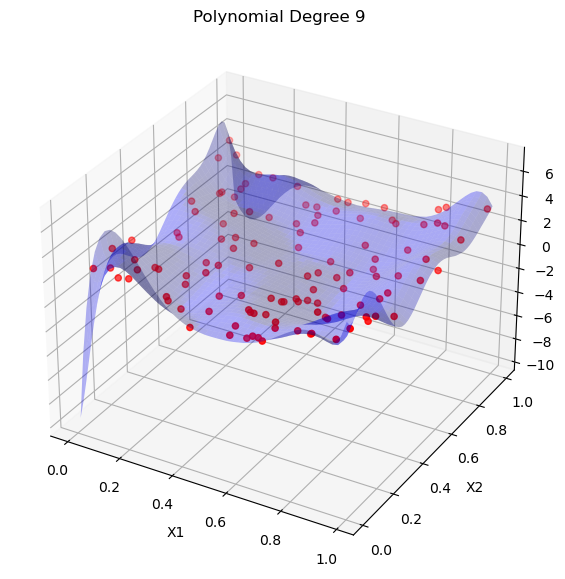

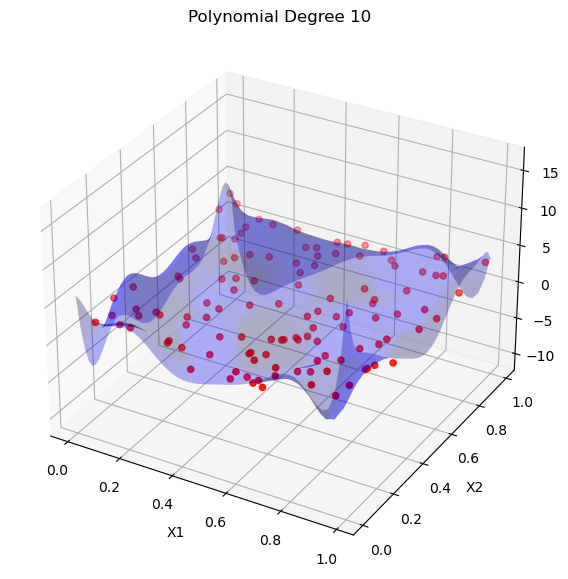

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Split it into training set, validation set and testing set.
train, temp = train_test_split(data, test_size=0.4, random_state=50, shuffle=False)
validation, test = train_test_split(temp, test_size=0.5, random_state=50, shuffle=False)

# Prepare data.
X_train = train[['x1', 'x2']]
y_train = train['y']
X_validation = validation[['x1', 'x2']]
y_validation = validation['y']

# Define lists to save errors and models.
validation_errors = []
models = []
degrees = range(1, 11)

for degree in degrees:
    # Create polynomial features.
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_validation_poly = poly.transform(X_validation)

    # Linear regression model.
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models.append(model)

    # Predict on validation set and calculate error.
    y_predict = model.predict(X_validation_poly)
    error = mean_squared_error(y_validation, y_predict)
    validation_errors.append(error)

# Plot validation error vs polynomial degree curve.
plt.figure(figsize=(20, 8))
plt.plot(degrees, validation_errors, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Polynomial Degree curve')
plt.grid(True)
plt.show()


# Plotting model surfaces.
def plot_model_surface(X, y, model, degree):
    figure = plt.figure(figsize=(10, 7))
    plot = figure.add_subplot(111, projection='3d')

    # Mesh grid for plotting model surfaces.
    x1 = np.linspace(X['x1'].min(), X['x1'].max(), 50)
    x2 = np.linspace(X['x2'].min(), X['x2'].max(), 50)
    x1, x2 = np.meshgrid(x1, x2)
    X_grid = np.c_[x1.ravel(), x2.ravel()]

    # Transform grid.
    poly = PolynomialFeatures(degree)
    X_grid_poly = poly.fit_transform(X_grid)

    # Predict on the grid.
    y_predict = model.predict(X_grid_poly).reshape(x1.shape)

    plot.plot_surface(x1, x2, y_predict, alpha=0.3, color='blue', rstride=1, cstride=1)
    plot.scatter(X['x1'], X['x2'], y, color='r', label='Training Data')

    plot.set_xlabel('X1')
    plot.set_ylabel('X2')
    plot.set_zlabel('Y')
    plot.set_title(f'Polynomial Degree {degree}')

    plt.show()


for degree in degrees:
    plot_model_surface(X_train, y_train, models[degree - 1], degree)

Polynomial degrees 1 to 10 have different fits to the training data, with low degrees possibly being too simple and high degrees potentially fitting too closely.

Looking at the plot of validation error versus polynomial degree from the code, the best degree for the polynomial is the one where the validation error is the lowest. I want a model that fits the data well without doing too much or too little (underfitting or overfitting), and the validation error use to find the good spot.

the validation errors for each polynomial degree from 1 to 10:

Degree 1: Error ≈ 0.9  
Degree 2: Error ≈ 0.18 (Lowest)  
Degree 3: Error ≈ 0.21  
Degree 4: Error ≈ 0.23  
Degree 5: Error ≈ 0.225  
Degree 6: Error ≈ 0.223  
Degree 7: Error ≈ 3.3  
Degree 8: Error ≈ 0.7  
Degree 9: Error ≈ 0.4  
Degree 10: Error ≈ 1.7  

The degree 2 polynomial shows the smallest validation error, around 0.18. This means it's the best choice among the tested models. It suggests that using a quadratic model (degree 2 polynomial) works well for this dataset.

# Question3

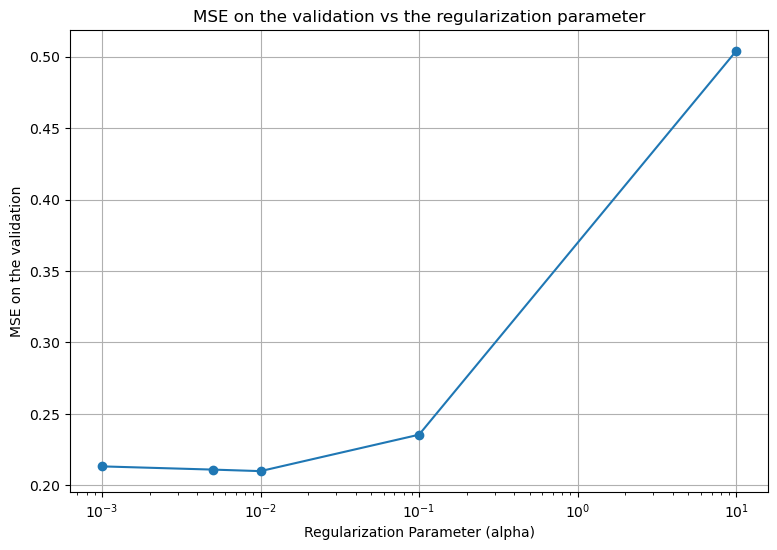

In [9]:
from sklearn.linear_model import Ridge

# Polynomial degree.
degree = 8

# Create polynomial features for degree 8.
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_validation_poly = poly.transform(X_validation)

# Regularization parameters.
regularization_parameters = [0.001, 0.005, 0.01, 0.1, 10]
validation_errors_ridge = []

# Apply ridge regression on the training set.
for alpha in regularization_parameters:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    # Predict on validation set and calculate MSE.
    y_predict = ridge_model.predict(X_validation_poly)
    error = mean_squared_error(y_validation, y_predict)
    validation_errors_ridge.append(error)

# Plot the MSE on the validation vs the regularization parameter.
plt.figure(figsize=(9, 6))
plt.plot(regularization_parameters, validation_errors_ridge, marker='o')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('MSE on the validation')
plt.title('MSE on the validation vs the regularization parameter')
plt.xscale('log') # Because the range of alpha values is broad.
plt.grid(True)
plt.show()

The figure displays how the Mean Squared Error (MSE) changes on the validation set based on the regularization parameter (alpha) for ridge regression using an 8th-degree polynomial. The MSE values for different alpha values:

Alpha = 0.001: MSE ≈ 0.22  
Alpha = 0.005: MSE ≈ 0.214  
Alpha = 0.01: MSE ≈ 0.21 (Lowest)  
Alpha = 0.1: MSE ≈ 0.235  
Alpha = 10: MSE ≈ 0.51

0.01 is the best regularization parameter because it gives the smallest MSE on the validation set. This means a bit of regularization is helpful in preventing overfitting, especially when using a high-degree polynomial like 8.

Choosing the right regularization parameter is important in ridge regression. It helps find the good spot between fitting the training data well and avoiding overfitting. The visualization helps figure out this perfect balance.

# Logistic Regression

# Question1

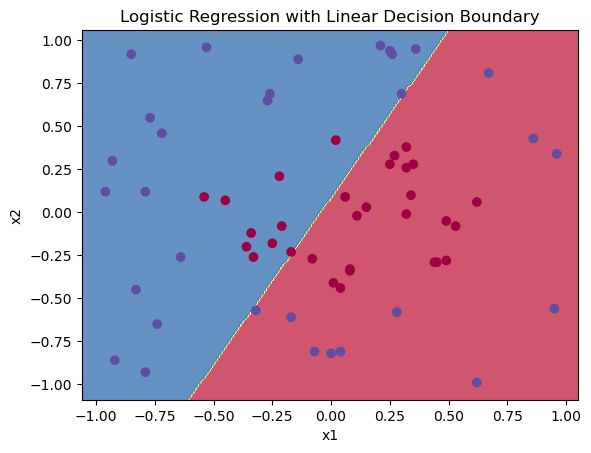

Training Accuracy: 0.6613
Testing Accuracy: 0.6818


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Load the training and testing data.
train_cls_data = pd.read_csv('train_cls.csv')
test_cls_data = pd.read_csv('test_cls.csv')

# Assigning class labels to binary values.
train_cls_data['class'] = train_cls_data['class'].map({'C1': 1, 'C2': 0})
test_cls_data['class'] = test_cls_data['class'].map({'C1': 1, 'C2': 0})

# Preparing data.
X_train_cls = train_cls_data[['x1', 'x2']]
y_train_cls = train_cls_data['class']
X_test_cls = test_cls_data[['x1', 'x2']]
y_test_cls = test_cls_data['class']

# Create and train the logistic regression.
logreg = LogisticRegression()
logreg.fit(X_train_cls, y_train_cls)

# Compute training and testing accuracy.
y_train_predict = logreg.predict(X_train_cls)
y_test_predict = logreg.predict(X_test_cls)
train_accuracy = accuracy_score(y_train_cls, y_train_predict)
test_accuracy = accuracy_score(y_test_cls, y_test_predict)

# Plot the decision boundary of the learned model on a scatterplot of the training set.
def plot_decision_boundary(X, y, model, plot, title):
    # Set min and max values and give some padding.
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01

    # Generate a grid of points with distance h between them.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plot.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plot.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plot.set_title(title)
    plot.set_xlabel('x1')
    plot.set_ylabel('x2')

figure, plot = plt.subplots()
plot_decision_boundary(X_train_cls.values, y_train_cls.values, logreg, plot, 'Logistic Regression with Linear Decision Boundary')
plt.show()

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

a model using logistic regression was trained as linear decision boundary on the given data. The accuracy on the training set is around 66.13%, and on the testing set, it's about 68.18%. These accuracies aren't very high, possibly because the model is quite simple (with a straight line) or because of the dataset's characteristics. Trying more complex models or tweaking the features might make it perform better.

# Question2

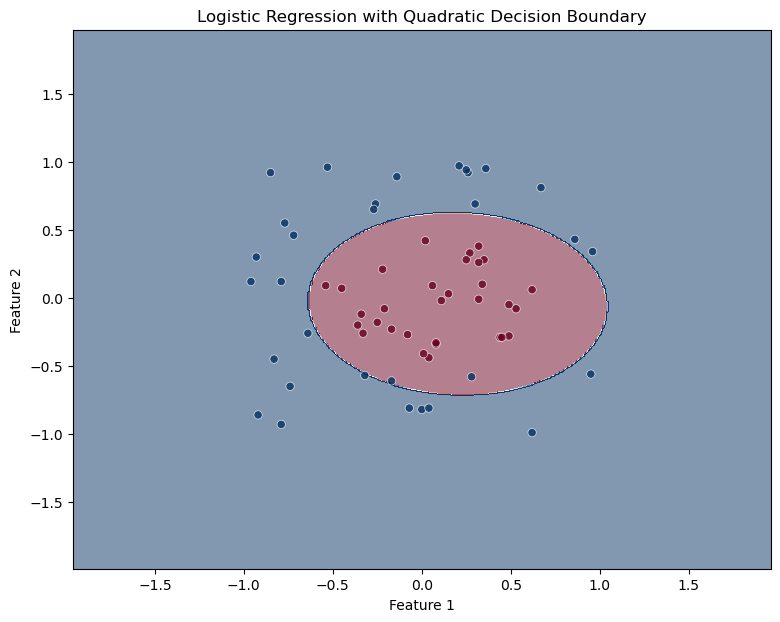

Training Accuracy: 0.9677
Testing Accuracy: 0.9545


In [14]:
# Load the training and testing data.
train_cls_data = pd.read_csv('train_cls.csv')
test_cls_data = pd.read_csv('test_cls.csv')

# Assigning class labels to binary values.
train_cls_data['class'] = train_cls_data['class'].map({'C1': 1, 'C2': 0})
test_cls_data['class'] = test_cls_data['class'].map({'C1': 1, 'C2': 0})

# Preparing data.
X_train_cls = train_cls_data[['x1', 'x2']].values
y_train_cls = train_cls_data['class'].values
X_test_cls = test_cls_data[['x1', 'x2']].values
y_test_cls = test_cls_data['class'].values

# Create polynomial features.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_cls)
X_test_poly = poly.transform(X_test_cls)

# Create and train the logistic regression.
logreg_poly = LogisticRegression()
logreg_poly.fit(X_train_poly, y_train_cls)

# Predict on the training and test data.
y_train_predict_poly = logreg_poly.predict(X_train_poly)
y_test_predict_poly = logreg_poly.predict(X_test_poly)

# Compute training and testing accuracy.
train_accuracy_poly = accuracy_score(y_train_cls, y_train_predict_poly)
test_accuracy_poly = accuracy_score(y_test_cls, y_test_predict_poly)


# Plot the decision boundary of the learned model on a scatterplot of the training set.
def plot_decision_boundary(X, y, model, degree):
    # Create a mesh grid.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # Predict the function value.
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plotting.
    plt.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(Z.min(), Z.max(), 100), cmap='RdBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap='RdBu', edgecolors='w', linewidth=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression with Quadratic Decision Boundary')

plt.figure(figsize=(9, 7))
plot_decision_boundary(X_train_cls, y_train_cls, logreg_poly, degree=2)
plt.show()

print(f"Training Accuracy: {train_accuracy_poly:.4f}")
print(f"Testing Accuracy: {test_accuracy_poly:.4f}")

The logistic regression model has a quadratic decision boundary, making it better at understanding the data. This can help improve accuracy, especially since the previous simple line model didn't perform very well.The accuracy on the training set is around 96.77%, and on the testing set, it's about 95.45%.

# Question3

Overfitting and underfitting are common issues in machine learning. Overfitting happens when a model learns the training data too well, including its noise, leading to poor performance on new data. Underfitting occurs when a model is too simple to grasp the data's underlying structure, resulting in poor overall performance.

Linear Decision Boundary:

If training accuracy is much higher than testing accuracy, it might indicate overfitting. If both are low, it could be underfitting.
In this results, the accuracies were close, suggesting overfitting isn't a big concern. However, the accuracies were not very high. The model might be too simple, and possibly underfitting the data. 


Quadratic Decision Boundary:

Adding polynomial features increases complexity. Higher complexity can risk overfitting. If the model performs much better on training data, overfitting might be happening.
In this results, both training and testing accuracies were high, showing the quadratic model captures complexity without overfitting.